In [1]:
# learn jiu jitsu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import env
import os
import wrangle

## Assigned Priority Questions
* Which lessons are least accessed?

* At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

* Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [2]:
# load data
df = wrangle.prep_logs()

# preview data
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


In [3]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 794244 entries, 2018-01-26 09:56:02 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        794244 non-null  object        
 1   user_id     794244 non-null  int64         
 2   cohort_id   747712 non-null  float64       
 3   ip          794244 non-null  object        
 4   name        747712 non-null  object        
 5   start_date  747712 non-null  datetime64[ns]
 6   end_date    747712 non-null  datetime64[ns]
 7   created_at  747712 non-null  datetime64[ns]
 8   updated_at  747712 non-null  datetime64[ns]
 9   program_id  747712 non-null  float64       
 10  program     747712 non-null  object        
 11  is_staff    794244 non-null  bool          
dtypes: bool(1), datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 73.5+ MB


### Priority Q
#### Which lessons are least accessed?

In [4]:
# view specific paths for users in the PHP program
df[(df['program_id'] == 1.0) & (df['path'].str.contains('.html') == False)]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 10:15:02,javascript-i/functions,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08 16:22:19,jquery/ajax/weather-map,428,19.0,70.121.183.95,Quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,1.0,Full-Stack PHP,False
2021-04-08 16:22:30,jquery/ajax/weather-map,428,19.0,70.121.183.95,Quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,1.0,Full-Stack PHP,False
2021-04-09 00:10:29,content/javascript,80,14.0,136.50.29.193,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,Full-Stack PHP,False


In [5]:
# views 
cohort_views = df.groupby(['name'])['path'].agg(['count', 'nunique'])
cohort_views

,count,nunique
name,,
Andromeda,22848,309
Apex,30812,258
Arches,7863,274
Badlands,51,26
Bash,16073,259
Bayes,22610,500
Betelgeuse,26836,291
Ceres,37108,280
Curie,18320,395


In [6]:
def smallest_lesson(df, cohort):
    # filter results
    df = df[df.name == cohort]
    df = df[df.path != '/']
    df = df[df.path != 'mkdocs/search_index.json']
    df = df[df.path != 'search/search_index.json']
    df = df[df.path != 'toc']
    df = df[df.path != 'index.html']
    df = df[df.path != 'fundamentals/modern-data-scientist.jpg']
    df = df[df.path != 'fundamentals/AI-ML-DL-timeline.jpg']
    df = df[df.path != 'spark-execution-diagram.svg']
    df = df[df.path.notnull()]
    small_lesson = df.path.value_counts().idxmin()
    
    return small_lesson

In [7]:
smallest_lesson(df, 'Bayes')

'distributed-ml/environment-setup'

### Priority Q
#### At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

Can we find evidence of the shutoff just by plotting the data from 2019?

In [8]:
# gather data from 2019 in a frame
data_2019 = df[(df.index > '2018-12-31 23:59:59') & (df.index < '2020-01-01 00:00:00')]
data_2019

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,26.0,73.31.215.224,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 12:56:12,java-i,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 12:59:46,java-i/strings,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 15:25:49,java-i/methods,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 15:32:26,javascript-ii,301,27.0,72.181.106.116,Yosemite,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,2.0,Full-Stack Java,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 15:44:39,java-iii/jdbc,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False
2019-12-31 15:44:41,java-iii/user-input,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False
2019-12-31 15:44:41,java-iii/passwords,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False


In [9]:
# resample path data by day
daily_2019 = data_2019['path'].resample('D').count()
daily_2019

date_time
2019-01-01     37
2019-01-02     77
2019-01-03     97
2019-01-04    112
2019-01-05     33
             ... 
2019-12-27     79
2019-12-28     88
2019-12-29     37
2019-12-30    163
2019-12-31     87
Freq: D, Name: path, Length: 365, dtype: int64

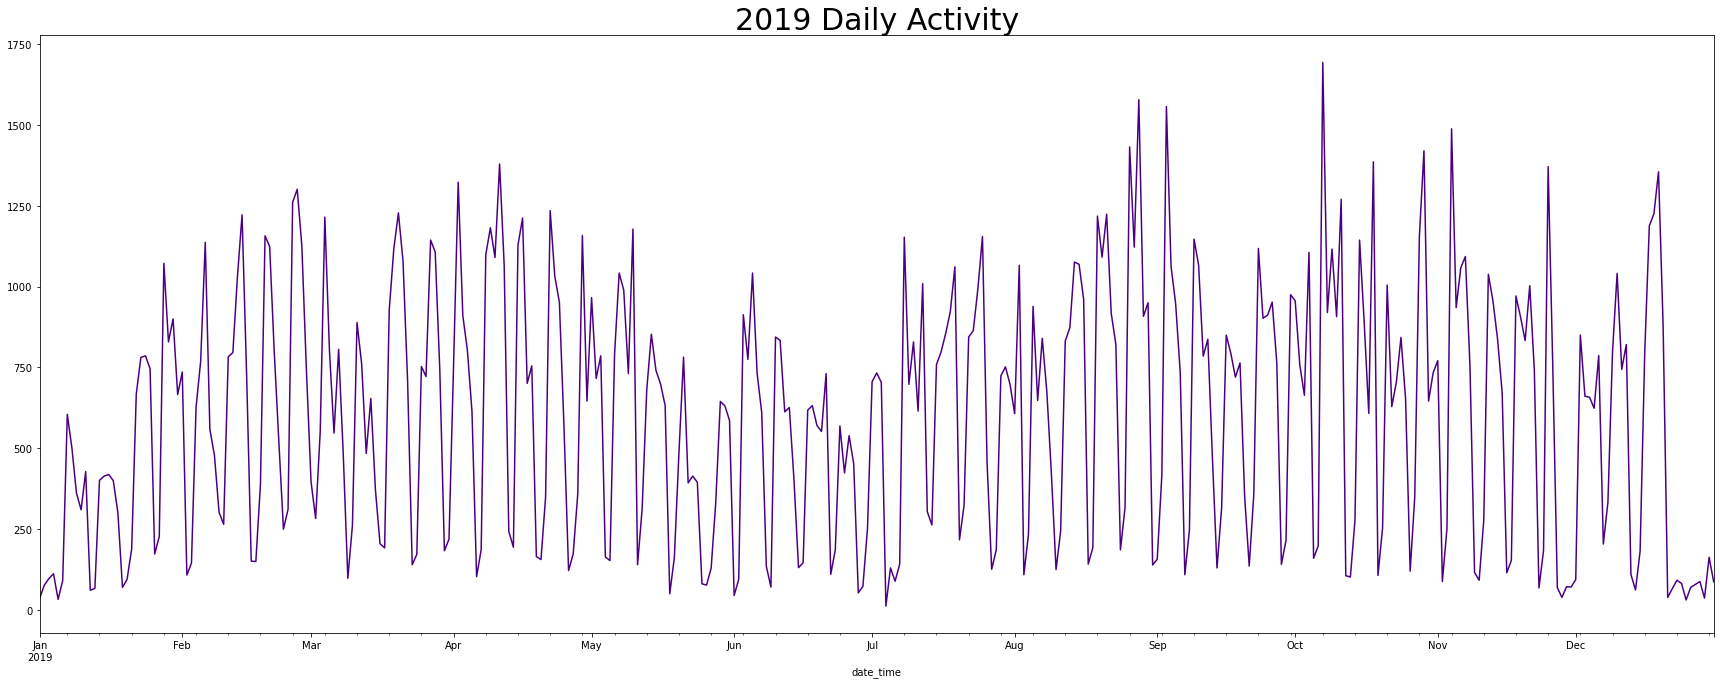

In [10]:
# create figure
plt.figure(figsize = (30, 11))

# plot number of paths taken per day
daily_2019.plot(color = 'indigo')

# title
plt.title('2019 Daily Activity', size = 30);

In [11]:
# resample path data by day
daily_activity = df['path'].resample('D').count()
daily_activity

date_time
2018-01-26     478
2018-01-27     169
2018-01-28     127
2018-01-29     714
2018-01-30     582
              ... 
2021-04-17     412
2021-04-18     545
2021-04-19    1866
2021-04-20    1686
2021-04-21     982
Freq: D, Name: path, Length: 1182, dtype: int64

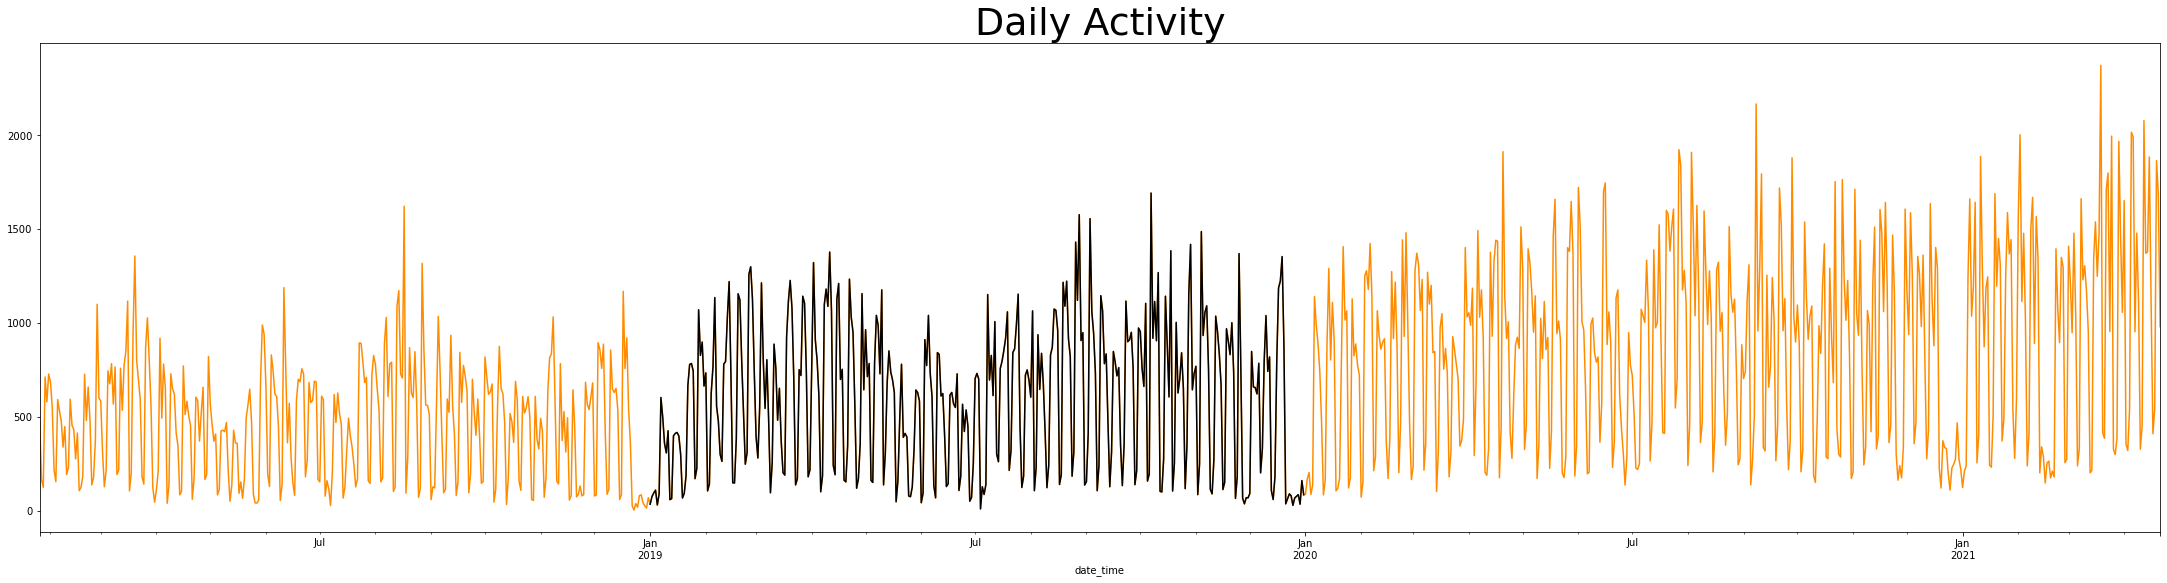

In [12]:
# create figure
plt.figure(figsize = (38, 9))

# plot number of paths taken per day
daily_activity.plot(color = 'darkorange')
daily_2019.plot(color = 'black')
plt.title('Daily Activity', size = 38);

I'm not picking up on anything. Let's resample by the hour.

In [13]:
# resample by the hour
hourly_activity = df['path'].resample('60T').count()
hourly_activity

date_time
2018-01-26 09:00:00    10
2018-01-26 10:00:00    51
2018-01-26 11:00:00    75
2018-01-26 12:00:00    20
2018-01-26 13:00:00    46
                       ..
2021-04-21 12:00:00    93
2021-04-21 13:00:00    77
2021-04-21 14:00:00    62
2021-04-21 15:00:00    68
2021-04-21 16:00:00    68
Freq: 60T, Name: path, Length: 28352, dtype: int64

In [14]:
# resample 2019 data by hour
hourly_2019 = data_2019['path'].resample('60T').count()
hourly_2019

date_time
2019-01-01 07:00:00    1
2019-01-01 08:00:00    0
2019-01-01 09:00:00    0
2019-01-01 10:00:00    0
2019-01-01 11:00:00    0
                      ..
2019-12-31 13:00:00    0
2019-12-31 14:00:00    1
2019-12-31 15:00:00    6
2019-12-31 16:00:00    0
2019-12-31 17:00:00    2
Freq: 60T, Name: path, Length: 8747, dtype: int64

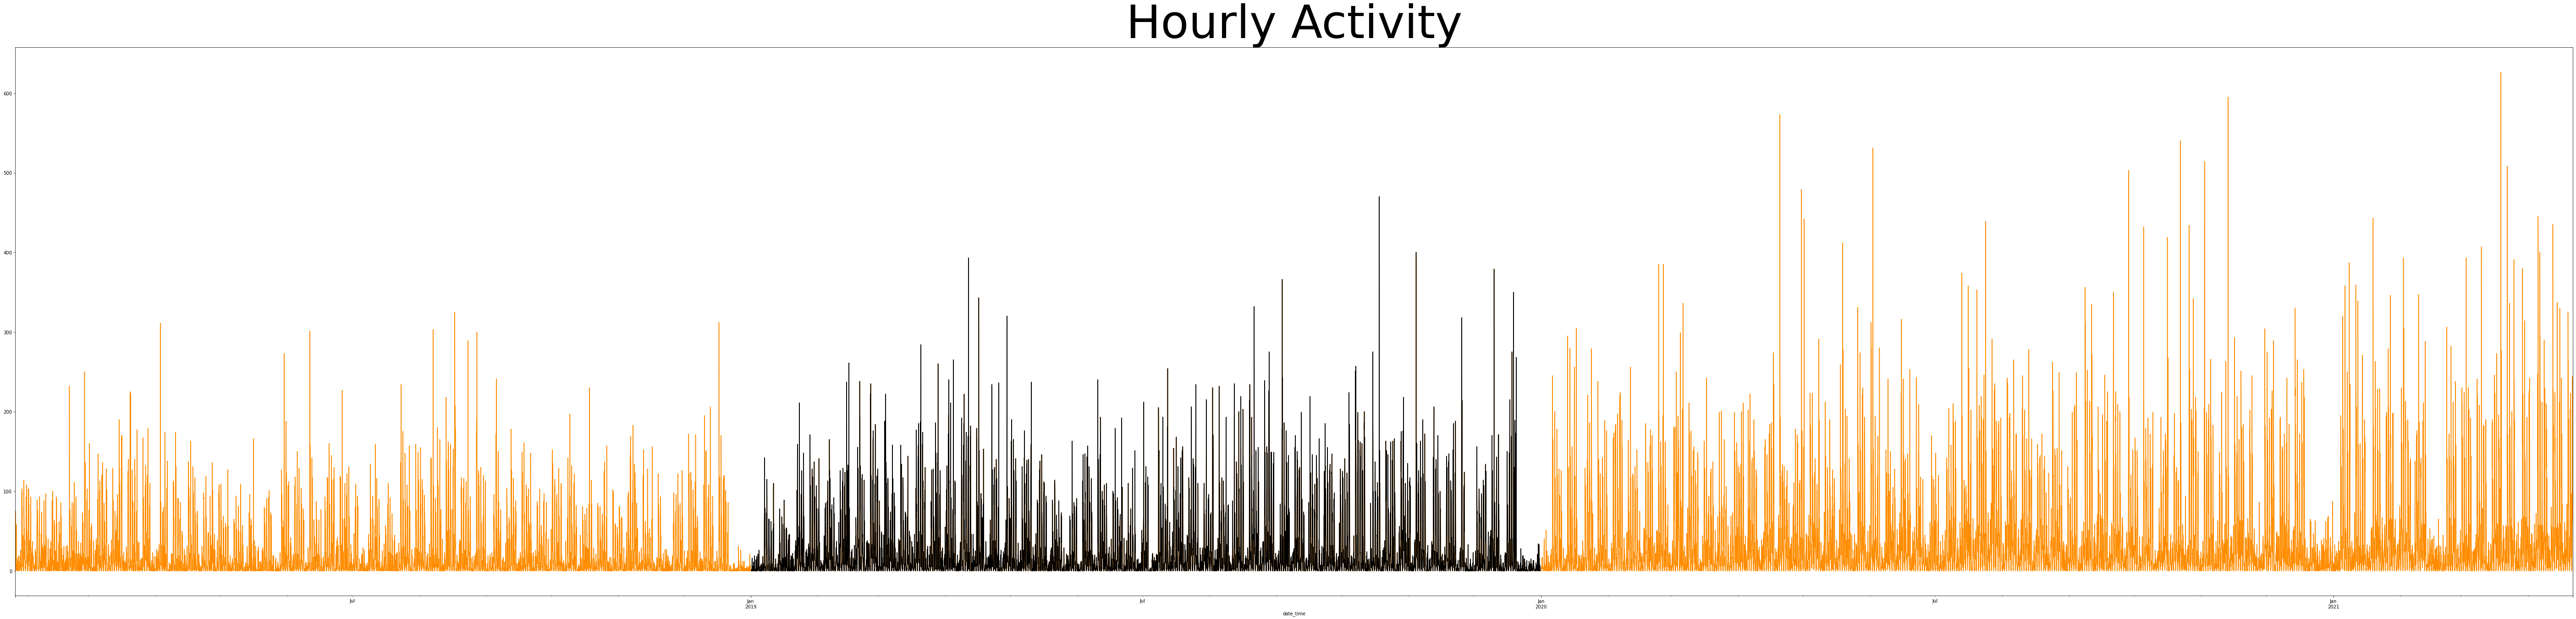

In [15]:
plt.figure(figsize = (100, 22))    # create figure

hourly_activity.plot(color = 'darkorange')    # plot hourly activity

hourly_2019.plot(color = 'black')    # plot hourly activity for 2019

plt.title('Hourly Activity', size = 100);    # title

This provides no more clarity than the first chart. I need an alternate route.

In [16]:
# assign variables to respective program data
full_stack_php = data_2019[data_2019.program_id == 1.0]
full_stack_java = data_2019[data_2019.program_id == 2.0]
data_science = data_2019[data_2019.program_id == 3.0]
front_end = data_2019[data_2019.program_id == 4.0]

In [17]:
# look at largest values and counts for paths for users in the java program
full_stack_java.path.value_counts().nlargest(30)

javascript-i                                                                 4404
search/search_index.json                                                     4277
html-css                                                                     3351
java-iii                                                                     3012
spring                                                                       2950
java-ii                                                                      2912
jquery                                                                       2709
mysql                                                                        2683
java-i                                                                       2603
javascript-ii                                                                2496
html-css/elements                                                            2170
mysql/tables                                                                 2005
html-css/css-ii/

In [18]:
# look at records where users in java program viewed regression material in the curriculum
cross_activity = full_stack_java[(full_stack_java.path.str.contains('regression') == True) & (full_stack_java.name != 'Staff')]
cross_activity

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-11 16:34:16,5-regression/1-overview,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-02 09:14:21,6-regression/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-23 11:46:24,6-regression/1-overview,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-09-01 00:03:01,6-regression/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-09-01 00:03:04,6-regression/2-regression-excel,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-10-02 16:31:58,6-regression/1-overview,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-02 16:32:04,6-regression/3.3-explore,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-02 16:32:05,6-regression/3.1-acquire-and-prep,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-08 11:43:03,6-regression/1-overview,458,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False


In [19]:
# view largest values and counts for the paths of data science students
data_science.path.value_counts().nlargest(30)

1-fundamentals/1.1-intro-to-data-science             486
6-regression/1-overview                              399
search/search_index.json                             335
6-regression/5.0-evaluate                            289
5-stats/3-probability-distributions                  282
5-stats/4.2-compare-means                            275
10-anomaly-detection/AnomalyDetectionCartoon.jpeg    274
10-anomaly-detection/1-overview                      273
appendix/cli-git-overview                            267
6-regression/7.0-model                               257
4-python/7.4.3-dataframes                            248
6-regression/4.0-explore                             240
6-regression/3.0-split-and-scale                     234
7-classification/project                             226
6-regression/6.0-feature-engineering                 215
4-python/7.4.4-advanced-dataframes                   211
5-stats/2-simulation                                 209
7-classification/3-prep        

In [20]:
# view records where datascience students had a path that contains 'java'
cross_active = data_science[(data_science.path.str.contains('java') == True) & (data_science.name != 'Staff')]
cross_active

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:30:44,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:07,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:11,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:12,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:14,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:19,java-ii,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:23,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:34,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False


In [21]:
# look at records where users in java program viewed pandas material in the curriculum
activity_cross = full_stack_java[(full_stack_java.path.str.contains('pandas') == True) & (full_stack_java.name != 'Staff')]
activity_cross

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-02-14 22:58:05,4.6.3_introduction_to_pandas,223,25.0,136.50.20.17,Wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,Full-Stack Java,False
2019-02-18 15:57:32,4.6.3_introduction_to_pandas,187,24.0,167.24.104.150,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-02-28 16:03:35,4.6.3_introduction_to_pandas,18,22.0,65.220.10.3,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-02-28 16:17:18,4.6.3_introduction_to_pandas,18,22.0,65.220.10.3,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-04-16 20:58:40,4.6.3_introduction_to_pandas,186,24.0,99.158.248.205,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-09-14 12:55:19,4-python/7.4-intro-to-pandas,420,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False


In [22]:
# look at records where users in java program viewed python material in the curriculum
activity_crossing = full_stack_java[(full_stack_java.path.str.contains('python') == True) & (full_stack_java.name != 'Staff')]
activity_crossing

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-18 20:33:26,4-python/1-overview,450,33.0,192.171.117.210,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 12:28:13,4-python/1-overview,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 12:29:19,4-python/2-introduction-to-python,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 13:18:38,4-python/3-data-types-and-variables,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-08-23 11:44:06,4-python/1-overview,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:44:23,4-python/2-introduction-to-python,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:45:33,4-python/1-overview,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:27,4-python/1-overview,420,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:36,4-python/3-data-types-and-variables,423,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False


In [23]:
# view records where datascience students had a path that contains 'html'
ds_html = data_science[(data_science.path.str.contains('html') == True) & (data_science.name != 'Staff')]
ds_html

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-09-25 19:30:42,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:30:49,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:13,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:16,html-css/introduction,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:17,html-css/elements,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:18,html-css/forms,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-27 06:49:23,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-27 06:49:32,html-css/introduction,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-27 06:49:42,html-css/elements,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False


In [24]:
# look at records where users in java program viewed statistics material in the curriculum
java_stats = full_stack_java[(full_stack_java.path.str.contains('stats') == True) & (full_stack_java.name != 'Staff')]
java_stats

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-11 14:01:54,2-stats/1-overview,186,24.0,24.243.59.161,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-07-11 16:47:18,2-stats/2.2-navigating-excel,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 18:51:15,2-stats/1-overview,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 18:51:32,2-stats/2.1-intro-to-excel,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 19:03:14,2-stats/2.2-excel-functions,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 19:27:27,2-stats/3.1-descriptive-stats,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-10 13:21:56,2-stats/3.1-descriptive-stats,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-31 23:56:45,5-stats/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-31 23:57:08,5-stats/sampling,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


In [25]:
java_funds = full_stack_java[(full_stack_java.path.str.contains('anomaly') == True) & (full_stack_java.name != 'Staff')]
java_funds

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-08-02 09:14:25,10-anomaly-detection/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-02 09:14:25,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-23 11:46:22,10-anomaly-detection/1-overview,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:22,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-12-12 16:41:43,10-anomaly-detection/1-overview,489,51.0,97.105.19.58,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2.0,Full-Stack Java,False
2019-12-12 16:41:44,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,489,51.0,97.105.19.58,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2.0,Full-Stack Java,False
2019-12-22 19:45:06,10-anomaly-detection/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-12-22 19:45:06,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


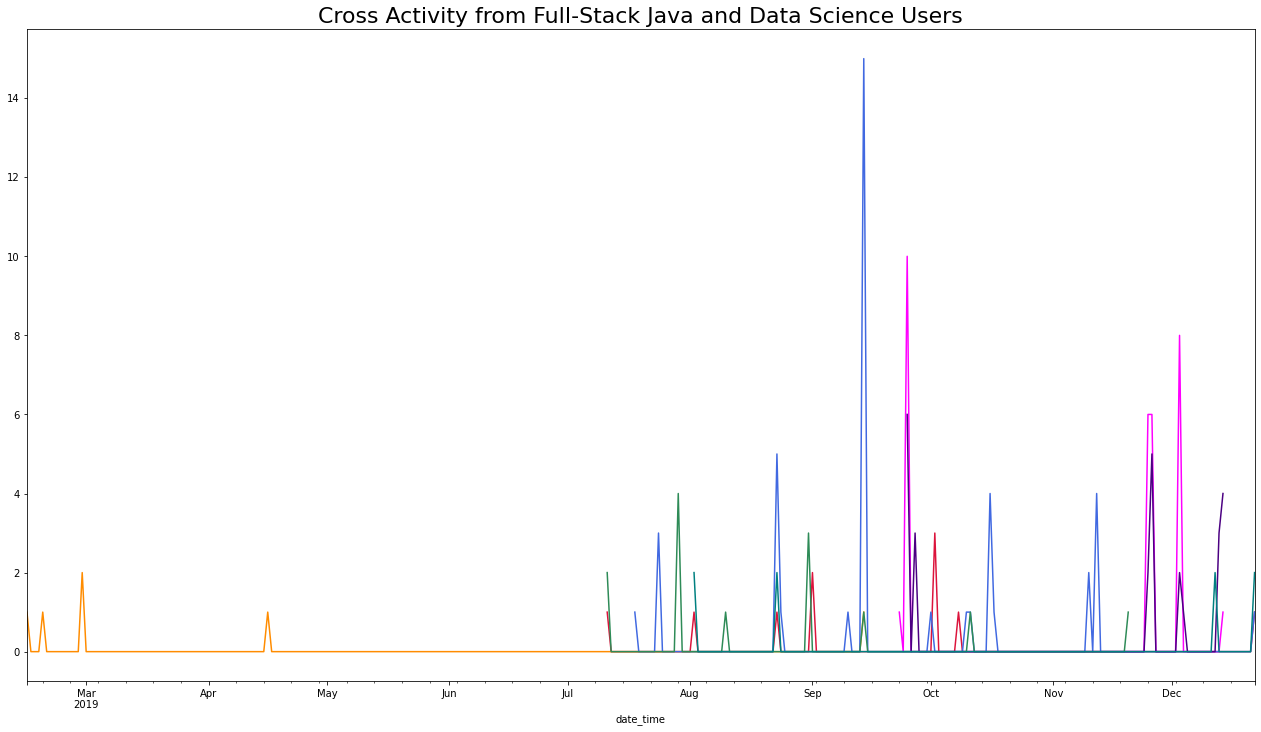

In [26]:
plt.figure(figsize = (22, 12))    # create figure for plots

plt.title('Cross Activity from Full-Stack Java and Data Science Users', size = 22)    # title

cross_day = cross_activity.path.resample('D').count()    # resample web dev users looking up regression

crosses_day = cross_active.path.resample('D').count()    # resample data science users looking up java 

day_crossing = activity_cross.path.resample('D').count()    # resample web dev users looking up pandas

day_cross = activity_crossing.path.resample('D').count()    # resample web dev users looking up python

ds_cross = ds_html.path.resample('D').count()    # resample data science users looking up html

java_cross = java_stats.path.resample('D').count()    # resample web dev users looking up stats

jawa_funds = java_funds.path.resample('D').count()    # resample web dev users looking up anomaly material


cross_day.plot(color = 'crimson')   # plot web dev user activity in regards to regression

crosses_day.plot(color = 'magenta')    # plot data science user activity in regards to java

day_crossing.plot(color = 'darkorange')    # plot web dev users looking up pandas

day_cross.plot(color = 'royalblue')    # plot we dev users looking up python

ds_cross.plot(color = 'indigo')    # plot data science users looking up html

java_cross.plot(color = 'seagreen')    # plot web dev users researching stats

jawa_funds.plot(color = 'teal');     # plot web dev users looking up anomaly material

There appears to be a big gap in cross activity from March to mid-April, and then again from mid-April to mid-July. This is the only evidence found for a supposed shut down.

### Priority Q
#### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [27]:
# create column that serves as a boolean mask to determine whether or not a user is active
df['active'] = df.index < df.end_date

In [28]:
# check it
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff,active
date_time,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True


In [29]:
# assign variable to all data where the user is active
active_logs = df[df.active == True]
active_logs

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff,active
date_time,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0,Full-Stack Java,False,True
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,Full-Stack Java,False,True
2021-04-21 16:37:48,java-iii,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0,Full-Stack Java,False,True


In [30]:
# assign variable to all logs accessed past graduation 
post_grad = df[df.active == False]
post_grad

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff,active
date_time,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
2018-01-26 10:15:02,javascript-i/functions,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False,False
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False,False
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False,False


In [31]:
# views 
active_users = active_logs.groupby(['user_id'])['path'].agg(['count', 'nunique'])
active_users

,count,nunique
user_id,,
2,1451,146
3,1424,163
4,625,137
5,1509,159
6,1201,152
...,...,...
976,22,7
977,82,10
978,34,15
